# Import Libraries
lets start the project by importing all the libraries that we will need in the project.

In [59]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load the Dataset

In [60]:

df = pd.read_csv("heart_attack_prediction_dataset.csv")

# print the first 5 rows of the dataframe
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# Exploratory Data Analysis (EDA)
### Explore Each Column

In [61]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [62]:
# Checking the data shape
df.shape

(8763, 26)

In [63]:
# Id column
df['Patient ID'].min(), df['Patient ID'].max()

('AAA9246', 'ZZY4724')

In [64]:
# Age column
df['Age'].min(), df['Age'].max()

(18, 90)

## Visualizations

In [65]:
# lets summerize the Age column
df['Age'].describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

NO missing values in the column so we are good to go...

<Axes: xlabel='Age', ylabel='Count'>

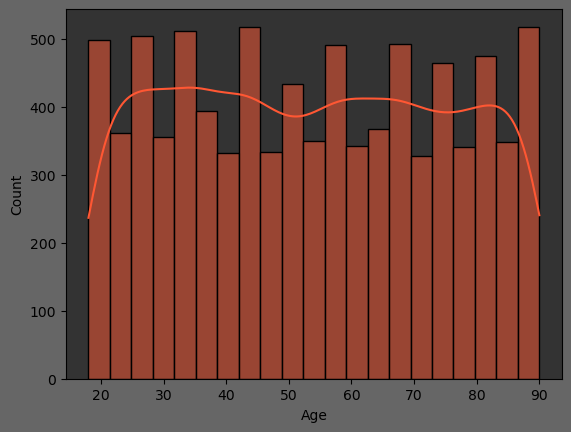

In [66]:
import seaborn as sns

# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

# Plot the histogram with custom colors
sns.histplot(df['Age'], kde=True, color="#FF5733", palette=custom_colors)


The Age column distribution seems to be normaly distributed because we can clearly see the bill curve.

Mean 53.70797672030127
Median 54.0
Mode 0    90
Name: Age, dtype: int64


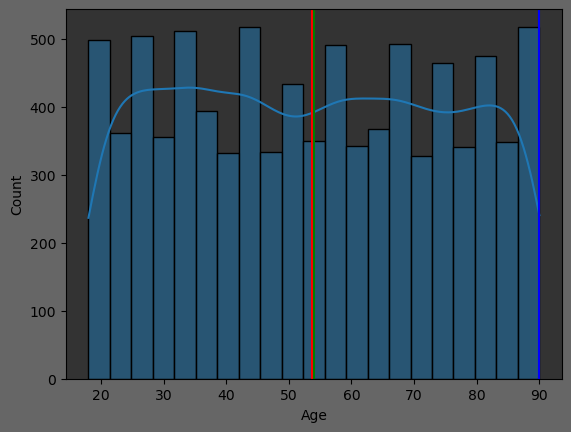

In [67]:
# Plot the mean, Median and mode of Age column using sns
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(), color='Red')
plt.axvline(df['Age'].median(), color= 'Green')
plt.axvline(df['Age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['Age'].mean())
print('Median', df['Age'].median())
print('Mode', df['Age'].mode())


Lets explore the gender base distribution of the dataset for Age column

In [68]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='Age', color= 'Sex')
fig.show()

In [69]:
# Find the values of sex column
df['Sex'].value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

In [70]:
# calculating the percentage fo male and female value counts in the data

male_count = 726
female_count = 194

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')


Male percentage i the data: 78.91%
Female percentage in the data : 21.09%
Males are 274.23% more than female in the data.


In [71]:
726/194

3.7422680412371134

In [72]:
# Find the values count of age column grouping by sex column
df.groupby('Sex')['Age'].value_counts()

Sex     Age
Female  25     49
        74     48
        68     48
        28     47
        33     47
               ..
Male    47     70
        39     70
        40     69
        23     67
        51     51
Name: count, Length: 146, dtype: int64

#### Exploring the dataset column

In [73]:
# find the unique values in the dataset column
df['Country'].value_counts()

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

In [74]:
# plot the countplot of dataset column
fig =px.bar(df, x='Country', color='Sex')
fig.show()

# print the values of dataset column groupes by sex
print (df.groupby('Sex')['Country'].value_counts())

Sex     Country       
Female  Argentina         158
        France            149
        Germany           146
        Colombia          142
        Italy             140
        China             140
        Brazil            135
        Canada            135
        Spain             133
        Australia         133
        Thailand          132
        United Kingdom    132
        Nigeria           129
        Vietnam           128
        South Africa      127
        South Korea       122
        New Zealand       119
        United States     119
        Japan             119
        India             114
Male    Germany           331
        Brazil            327
        United Kingdom    325
        Nigeria           319
        Australia         316
        New Zealand       316
        Japan             314
        Argentina         313
        Canada            305
        United States     301
        South Africa      298
        India             298
        Spain    

In [75]:
# make a plot of age column using plotly and coloring by dataset

fig = px.histogram(data_frame=df, x='Age', color= 'Country')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",df.groupby('Country')['Age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",df.groupby('Country')['Age'].median())
print("___________________________________________________________")
print ("Mode of the dataset: ",df.groupby('Country')['Age'].agg(lambda x: x.mode().iloc[0]))
print("___________________________________________________________")

___________________________________________________________
Mean of the dataset:  Country
Argentina         54.180467
Australia         52.641425
Brazil            52.779221
Canada            53.795455
China             55.330275
Colombia          53.030303
France            53.181614
Germany           52.605870
India             55.354369
Italy             55.287703
Japan             51.309469
New Zealand       54.275862
Nigeria           55.625000
South Africa      53.891765
South Korea       54.080685
Spain             52.383721
Thailand          53.170561
United Kingdom    52.940919
United States     55.257143
Vietnam           53.315294
Name: Age, dtype: float64
___________________________________________________________
Median of the dataset:  Country
Argentina         54.0
Australia         52.0
Brazil            53.5
Canada            54.0
China             57.0
Colombia          54.0
France            52.0
Germany           51.0
India             57.5
Italy             57.0
Ja

In [76]:
# value count of cp column
df['Cholesterol'].value_counts()

Cholesterol
235    52
360    47
149    46
218    46
251    45
       ..
248    20
186    20
328    20
398    20
397    19
Name: count, Length: 281, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='count'>

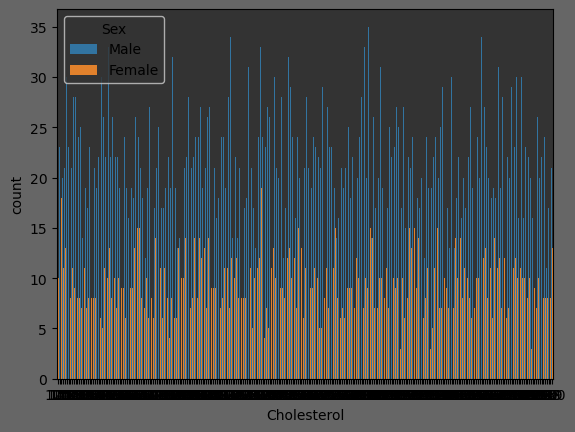

In [77]:

sns.countplot(df, x='Cholesterol', hue= 'Sex')

<Axes: xlabel='Cholesterol', ylabel='count'>

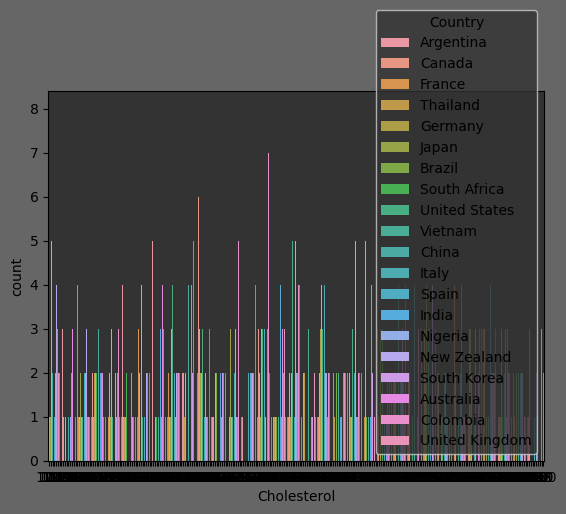

In [78]:
sns.countplot(df,x='Cholesterol',hue='Country')

In [79]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=df, x='Age', color='Cholesterol')
fig.show()

In [80]:
# lets summerize the trestbps column
df['Blood Pressure'].describe()

count       8763
unique      3915
top       146/94
freq           8
Name: Blood Pressure, dtype: object

### **Handling missing values in trestbps column**

In [81]:
# Dealing with Missing values in trestbps column.
# find the percentage of misssing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['Blood Pressure'].isnull().sum() /len(df) *100:.2f}%")

Percentage of missing values in trestbps column: 0.00%


`Removing missing values using Iterative imputer`

In [82]:
# Split the 'Blood Pressure' column into systolic and diastolic values
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True, n=1).astype(float)

# Fill the missing values in the 'Systolic' column using the IterativeImputer
imputer_systolic = IterativeImputer(max_iter=10, random_state=42)
df['Systolic'] = imputer_systolic.fit_transform(df[['Systolic']])

# Fill the missing values in the 'Diastolic' column using the IterativeImputer
imputer_diastolic = IterativeImputer(max_iter=10, random_state=42)
df['Diastolic'] = imputer_diastolic.fit_transform(df[['Diastolic']])

# Combine the 'Systolic' and 'Diastolic' columns back into the 'Blood Pressure' column
df['Blood Pressure'] = df['Systolic'].astype(str) + '/' + df['Diastolic'].astype(str)

# Check the missing values in the 'Blood Pressure' column
print(f"Missing values in Blood Pressure column: {df['Blood Pressure'].isnull().sum()}")

Missing values in Blood Pressure column: 0


`Let impute other columns with missing values:`

In [83]:
# First lets see data types or category of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [84]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

Patient ID                         0.0
Age                                0.0
Systolic                           0.0
Heart Attack Risk                  0.0
Hemisphere                         0.0
Continent                          0.0
Country                            0.0
Sleep Hours Per Day                0.0
Physical Activity Days Per Week    0.0
Triglycerides                      0.0
BMI                                0.0
Income                             0.0
Sedentary Hours Per Day            0.0
Stress Level                       0.0
Medication Use                     0.0
Previous Heart Problems            0.0
Diet                               0.0
Exercise Hours Per Week            0.0
Alcohol Consumption                0.0
Obesity                            0.0
Smoking                            0.0
Family History                     0.0
Diabetes                           0.0
Heart Rate                         0.0
Blood Pressure                     0.0
Cholesterol              

In [85]:
print(f"The missing values in thal column are: {df['Diet'].isnull().sum()}")


The missing values in thal column are: 0


In [86]:
df['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [87]:
df.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
8758,MSV9918,60,Male,121,94.0/76.0,61,1,1,1,0,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94.0,76.0
8759,QSV6764,28,Female,120,157.0/102.0,73,1,0,0,1,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157.0,102.0
8760,XKA5925,47,Male,250,161.0/75.0,105,0,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161.0,75.0
8761,EPE6801,36,Male,178,119.0/67.0,60,1,0,1,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119.0,67.0
8762,ZWN9666,25,Female,356,138.0/67.0,75,1,1,0,0,...,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1,138.0,67.0



## Dealing with Missing  values (Categorical with Machine learning Models)

### Steps: 

1. FInd the collumns with missing values and store in an object
3. FInd the Columns based on data type
    1. Numeric columns.
    2. Categorical Columns.
    3. Boolean.
4. Define the function to impute missing values.
5. Apply the function to our dataset with missing values.
6. Check the missing values after imputation.

In [88]:
# find missing values.
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)


Series([], dtype: int64)

In [89]:

missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

missing_data_cols

[]

In [90]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols

print(f'categorical Columns: {cat_cols}')
print(f'numerical Columns: {Num_cols}')

categorical Columns: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
numerical Columns: ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'Systolic', 'Diastolic']


In [91]:
# FInd columns 
categorical_cols = ['Diet', 'Sex', 'Continent', 'Blood Pressure', 'Country','Hemisphere', 'cp','Patient ID']
bool_cols = ['Blood Pressure', 'Diet']
numerical_cols = ['Cholesterol', 'Age', 'Diabetes', 'Smoking', 'Obesity','Alcohol Consumption','BMI','Systolic','Diastolic']

### Imputing Missing Values with Machine learning model

In [92]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [93]:
df.isnull().sum().sort_values(ascending=False)

Patient ID                         0
Age                                0
Systolic                           0
Heart Attack Risk                  0
Hemisphere                         0
Continent                          0
Country                            0
Sleep Hours Per Day                0
Physical Activity Days Per Week    0
Triglycerides                      0
BMI                                0
Income                             0
Sedentary Hours Per Day            0
Stress Level                       0
Medication Use                     0
Previous Heart Problems            0
Diet                               0
Exercise Hours Per Week            0
Alcohol Consumption                0
Obesity                            0
Smoking                            0
Family History                     0
Diabetes                           0
Heart Rate                         0
Blood Pressure                     0
Cholesterol                        0
Sex                                0
D

In [94]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

In [95]:
df.isnull().sum().sort_values(ascending=False)


Patient ID                         0
Age                                0
Systolic                           0
Heart Attack Risk                  0
Hemisphere                         0
Continent                          0
Country                            0
Sleep Hours Per Day                0
Physical Activity Days Per Week    0
Triglycerides                      0
BMI                                0
Income                             0
Sedentary Hours Per Day            0
Stress Level                       0
Medication Use                     0
Previous Heart Problems            0
Diet                               0
Exercise Hours Per Week            0
Alcohol Consumption                0
Obesity                            0
Smoking                            0
Family History                     0
Diabetes                           0
Heart Rate                         0
Blood Pressure                     0
Cholesterol                        0
Sex                                0
D

>`Now Missing values are imputed and there is no missing values in the columns....`

## `Dealing With Outliers`

>Let's create a box plots for all the numeric columns using for loop and subplot.
* By doing we will be able to analyze outliers in the columns.

_________________________________________________________________________________________________________________________________________________


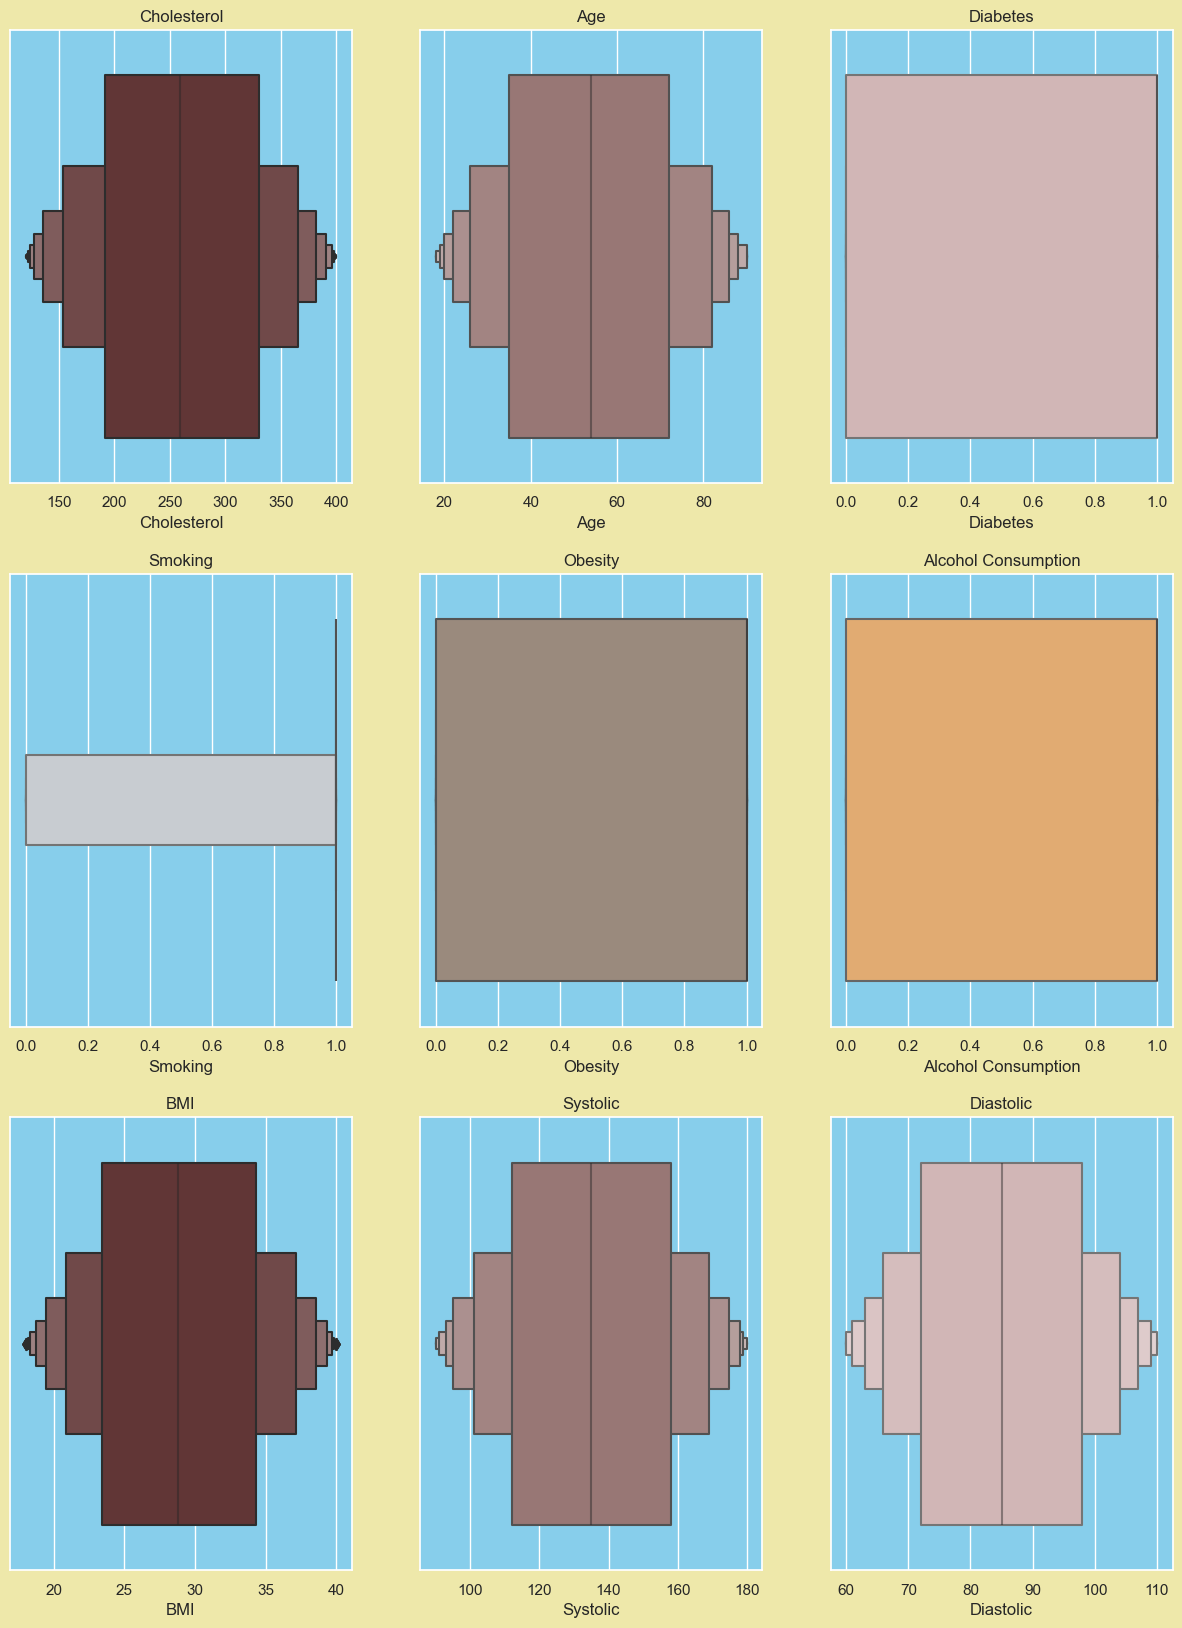

In [96]:
print("_________________________________________________________________________________________________________________________________________________")

sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(15,20))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1)
##E6E6FA
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()
##E6E6FA

## `1. Handling Outliers in Blood Pressure column`

In [97]:
# print the row from df where trestbps value is 0
df[df['Blood Pressure']==0]


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic


In [98]:
# Remove the column because it is an outlier because trestbps cannot be zero.
df= df[df['Blood Pressure']!=0]

##### `Let's see again to check the outliers:`

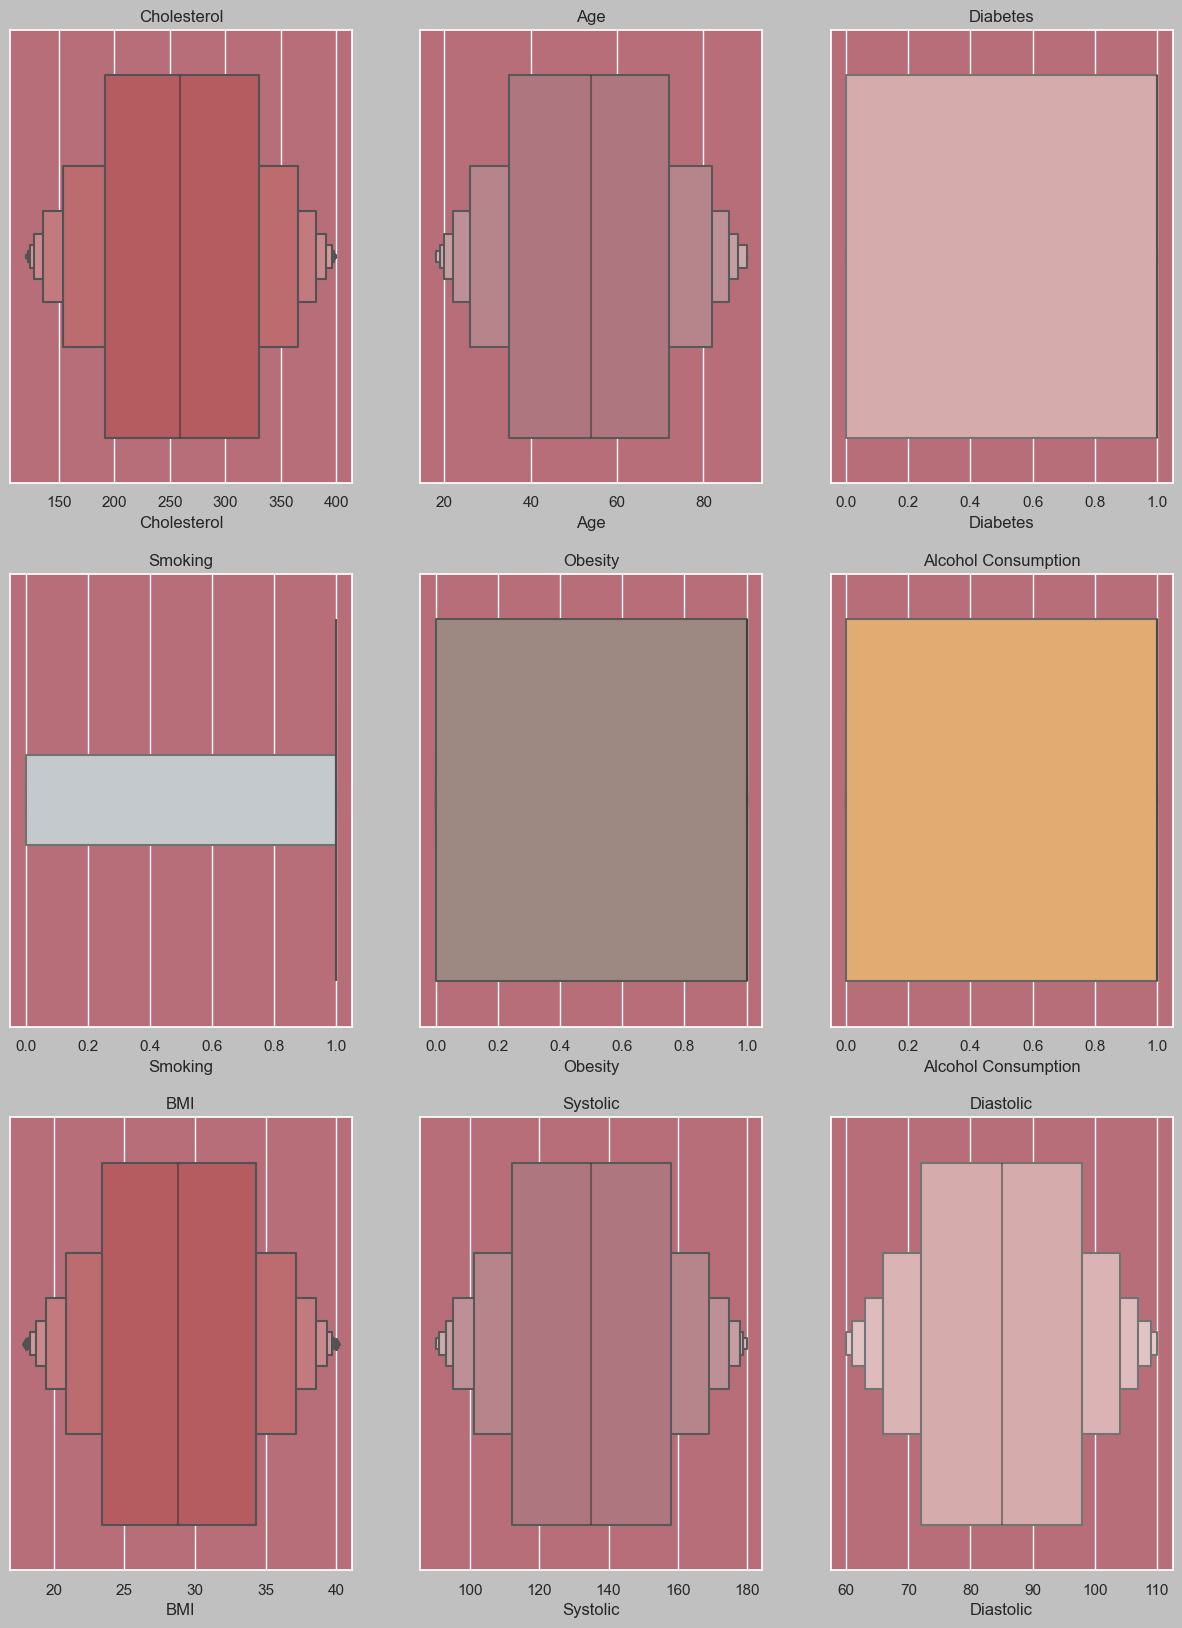

In [99]:
sns.set(rc={"axes.facecolor":"#B76E79","figure.facecolor":"#C0C0C0"})
modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)

plt.figure(figsize=(15,20))



for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1)
    sns.boxenplot(x=df[col], color=modified_palette[i % len(modified_palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()

##### `Analysis of the plot`

In [100]:
df['Blood Pressure'].describe()


count           8763
unique          3915
top       146.0/94.0
freq               8
Name: Blood Pressure, dtype: object

## `2. Handling Oldpeak Outliers`

In [101]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,...,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,...,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,...,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,...,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


___________________________________________________________________________________________________________________________________________________________________


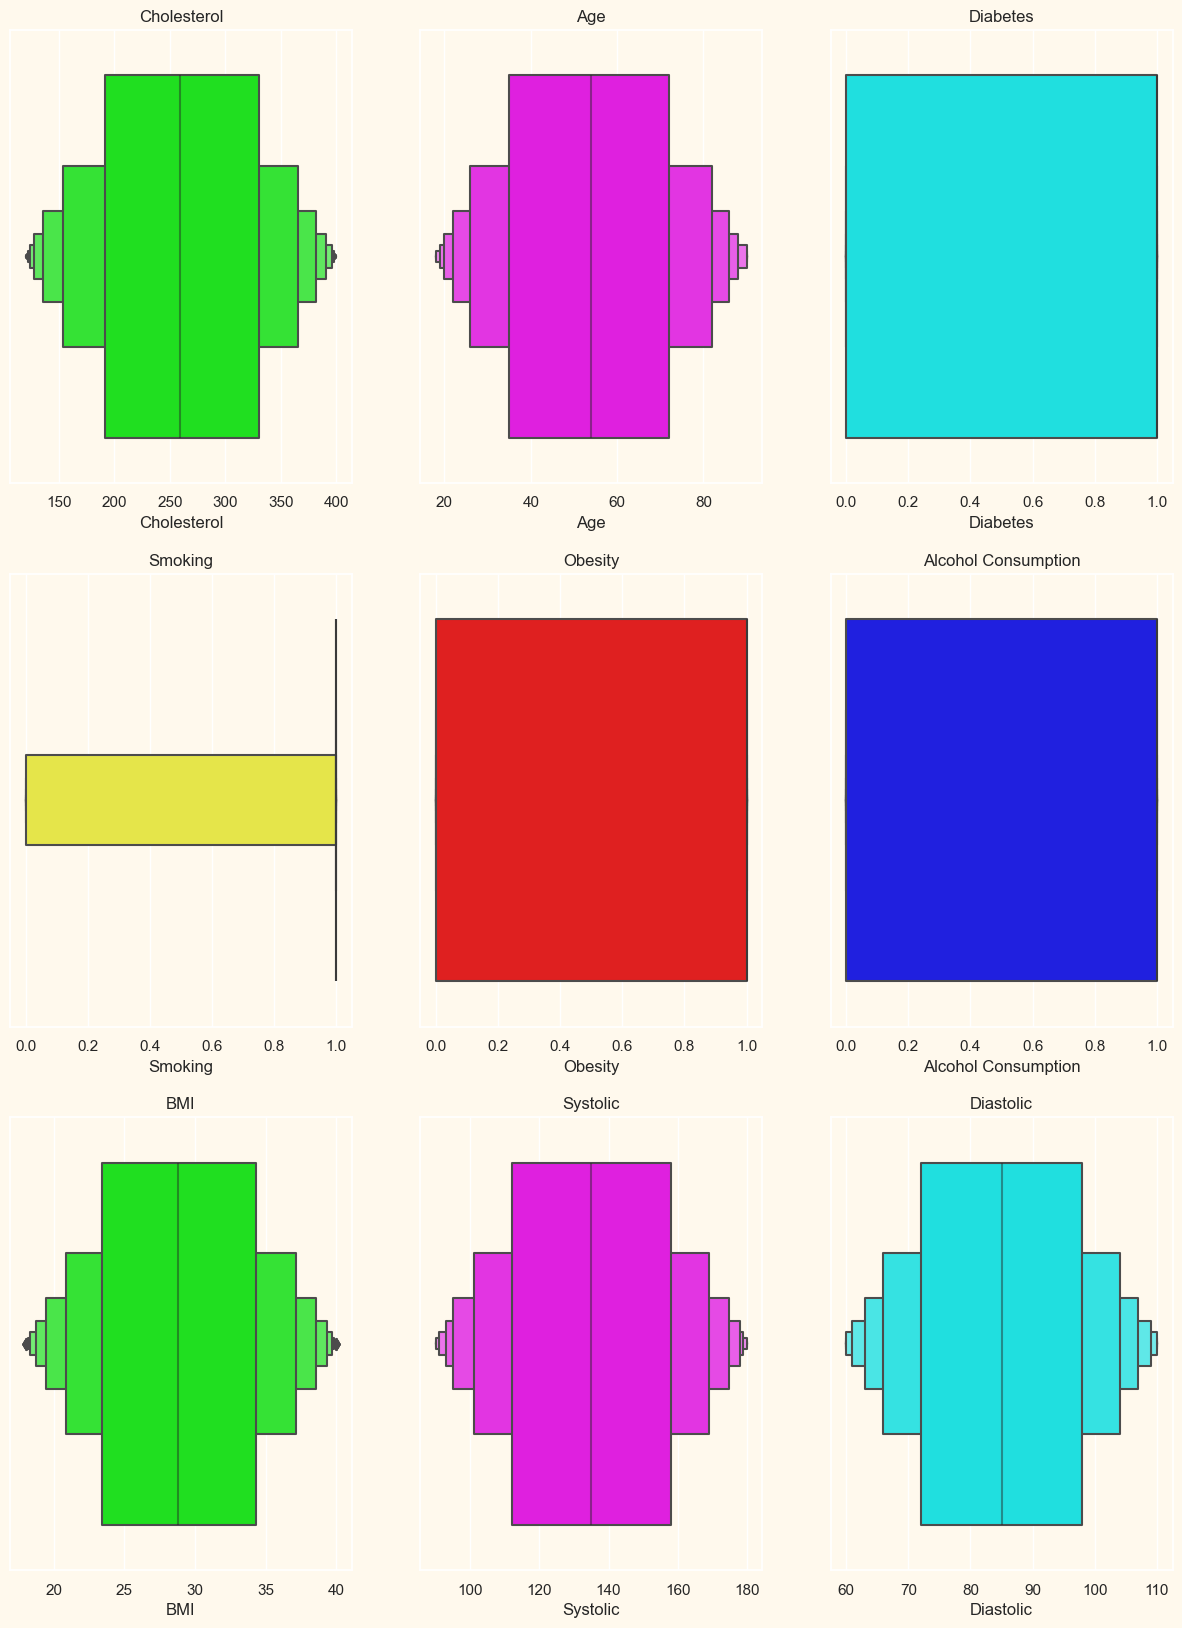

In [102]:
print("___________________________________________________________________________________________________________________________________________________________________")

# Set facecolors
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define the "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

# Use the "night vision" palette for the plots
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxenplot(x=df[col], color=night_vision_palette[i % len(night_vision_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()


#### `Analysis of the plot`

## `3. Handling Outliers in Age Column`

In [103]:
df.Age.describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

## `4. Handling Blood Pressure column outliers`

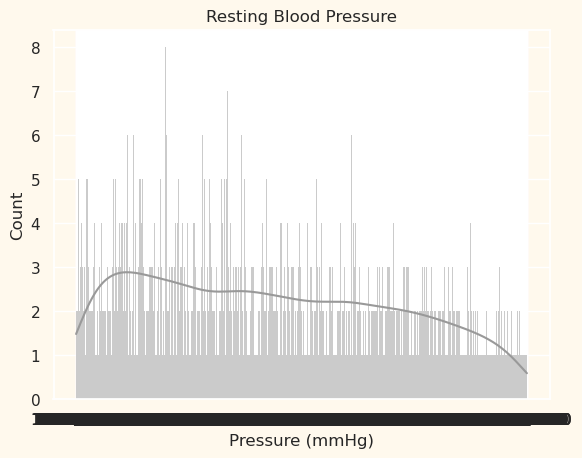

In [104]:
palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=df, 
             x='Blood Pressure', 
             kde=True,
             color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2] 
 

<Axes: xlabel='Blood Pressure', ylabel='Count'>

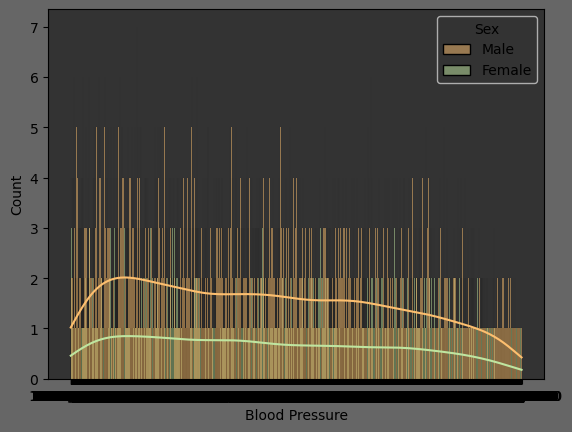

In [105]:
# create a histplot trestbops column to analyse with sex column
sns.histplot(df, x='Blood Pressure', kde=True, palette = "Spectral", hue ='Sex') 

##### `Analysis of plot`



> * Everything seems ok and there is no outliers in the columns.
> * Columns are cleaned from outliers and missing values and we have already analysis the data.
> * The next step should be Model building.

# `Machine Learning Models`

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [107]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

In [108]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,Male,208,158.0/88.0,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158.0,88.0
1,CZE1114,21,Male,389,165.0/93.0,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165.0,93.0
2,BNI9906,21,Female,324,174.0/99.0,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174.0,99.0
3,JLN3497,84,Male,383,163.0/100.0,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163.0,100.0
4,GFO8847,66,Male,318,91.0/88.0,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91.0,88.0


`Feature that we will be using in Machine Learning Models building`

In [109]:
# split the data into X and y
X= df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

"""encode X data using separate label encoder for all categorical columns and save it for inverse transform"""
# Task: Separate Encoder for all categorical and object columns and inverse transform at the end. 
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass
        

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi_class classification.

1. logistic regression.
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

In [110]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error




`Create a function for models and evaluate them`

In [111]:
import warnings
warnings.filterwarnings('ignore')


 
    

In [112]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),   
    
    ('Support Vector Machine', SVC(random_state=42)),
    
    ('Naye base Classifier', GaussianNB())
    
    
]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])
    
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # make prediction on the test data
    y_pred = pipeline.predict(X_test)
    
    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()
    
    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
    
# Retrieve the best model
print("Best Model: ", best_model)
    
    
    
    

Model Logistic Regression
Cross Validatino accuracy:  0.642150671929262
Test Accuracy:  0.6385404789053591

Model Gradient Boosting
Cross Validatino accuracy:  0.6358100000562587
Test Accuracy:  0.6351197263397947

Model KNeighbors Classifier
Cross Validatino accuracy:  0.5749441632851197
Test Accuracy:  0.5530216647662486

Model Decision Tree Classifier
Cross Validatino accuracy:  0.5413366895639392
Test Accuracy:  0.5575826681870011

Model AdaBoost Classifier
Cross Validatino accuracy:  0.6356834984524852
Test Accuracy:  0.6316989737742303

Model Random Forest
Cross Validatino accuracy:  0.6358100804257656
Test Accuracy:  0.6339794754846066

Model XGboost Classifier
Cross Validatino accuracy:  0.5876218904033184
Test Accuracy:  0.6168757126567845

Model Support Vector Machine
Cross Validatino accuracy:  0.642150671929262
Test Accuracy:  0.6385404789053591

Model Naye base Classifier
Cross Validatino accuracy:  0.642150671929262
Test Accuracy:  0.6385404789053591

Best Model:  Pipelin

# `Evaluation of Models`

In [113]:
categorical_cols = ['Diet', 'Sex', 'Continent', 'Blood Pressure', 'Country','Hemisphere','Patient ID']


In [114]:
def evaluate_classification_models(X, y, categorical_columns):
    # Encode categorical columns
    X_encoded = X.copy()
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    # Define models
    models = {
        "Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "NB": GaussianNB(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier()
    }
    
    # Train and evaluate models
    results = {}
    best_model = None
    best_accuracy = 0.0
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = name
    
    return results, best_model

# Example usage:
results, best_model = evaluate_classification_models(X, y, categorical_cols)
print("Model accuracies:", results)
print("Best model:", best_model)


Model accuracies: {'Logistic Regression': 0.6417569880205363, 'KNN': 0.5687393040501997, 'NB': 0.6417569880205363, 'SVM': 0.6417569880205363, 'Decision Tree': 0.558471192241871, 'Random Forest': 0.638904734740445, 'XGBoost': 0.6006845407872219, 'GradientBoosting': 0.6400456360524814, 'AdaBoost': 0.6360524814603536}
Best model: Logistic Regression


# `Hyper Parameter Tuning `

In [115]:

X = df[categorical_cols]  # Select the categorical columns as input features
y = df['Heart Attack Risk']  # Sele

In [116]:
def hyperparameter_tuning(X, y, categorical_columns, models):
    # Define dictionary to store results
    results = {}
    
    # Encode categorical columns
    X_encoded = X.copy()
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
    if model_name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10, 100]}
    elif model_name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif model_name == 'NB':
        param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
    elif model_name == 'SVM':
        param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
    elif model_name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'XGBoost':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
    elif model_name == 'GradientBoosting':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
    elif model_name == 'AdaBoost':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}

        
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        
        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}
    
    return results

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Example usage:
results = hyperparameter_tuning(X, y, categorical_cols, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()


Model: AdaBoost
Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 0.6417569880205363



The best performing model is Logistic Regression, with an accuracy of 0.6417569880205363.
The other high-performing models are:
Naive Bayes (0.6417569880205363)
SVM (0.6417569880205363)
Random Forest (0.638904734740445)
Gradient Boosting (0.6394751853964632)
The lower-performing models are:
KNN (0.5687393040501997)
Decision Tree (0.5579007415858528)
XGBoost (0.6006845407872219)
AdaBoost (0.6360524814603536)